## Cavilier Capital

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df = pd.read_csv('../Data/Stocks/aapl.us.txt')
df

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0
...,...,...,...,...,...,...,...
8359,2017-11-06,171.75000,174.36000,171.10000,173.63000,34901241,0
8360,2017-11-07,173.29000,174.51000,173.29000,174.18000,24424877,0
8361,2017-11-08,174.03000,175.61000,173.71000,175.61000,24451166,0
8362,2017-11-09,174.48000,175.46000,172.52000,175.25000,29533086,0


In [4]:
df.Date.max()

'2017-11-10'

In [5]:
from os import listdir
from os.path import isfile, join
mypath = '../Data/Stocks'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [6]:
len(onlyfiles)

7195

In [7]:
sample_filenames = onlyfiles[:100]

In [8]:
grand_df = pd.DataFrame()
for s in sample_filenames:
    # print(s, sep=',')
    try:
        df = pd.read_csv('../Data/Stocks/' + s)
        df['company'] = s.split('.')[0]
        grand_df = pd.concat([grand_df,df])
    except:
        print(s, " has no columns to parse")
grand_df.head()

,Date,Open,High,Low,Close,Volume,OpenInt,company
0,2005-02-25,16.388,16.406,15.862,16.179,18546,0,qumu
1,2005-02-28,16.016,16.306,15.744,15.898,13478,0,qumu
2,2005-03-01,15.880,15.898,15.581,15.853,30420,0,qumu
3,2005-03-02,15.853,15.853,15.491,15.708,174465,0,qumu
4,2005-03-03,15.771,15.989,15.690,15.935,54368,0,qumu


In [9]:
gd_latest = grand_df[grand_df.Date == '2017-11-10']

Text(0.5, 1.0, 'First 100 Stock Close Price Distribution on 11/10/2017')

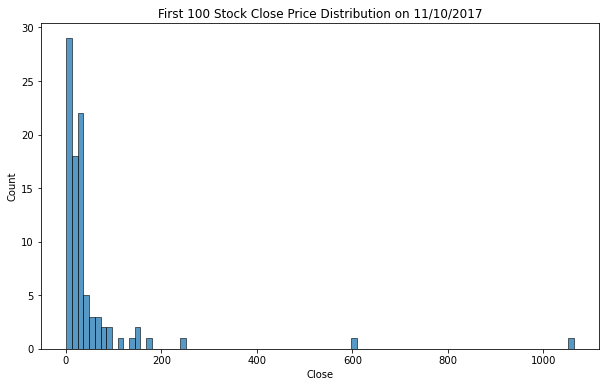

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(gd_latest.Close)
plt.title('First 100 Stock Close Price Distribution on 11/10/2017')

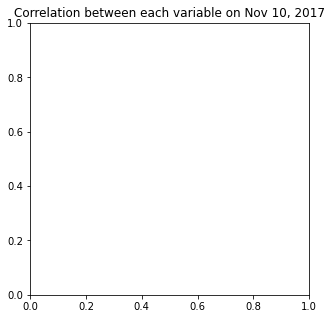

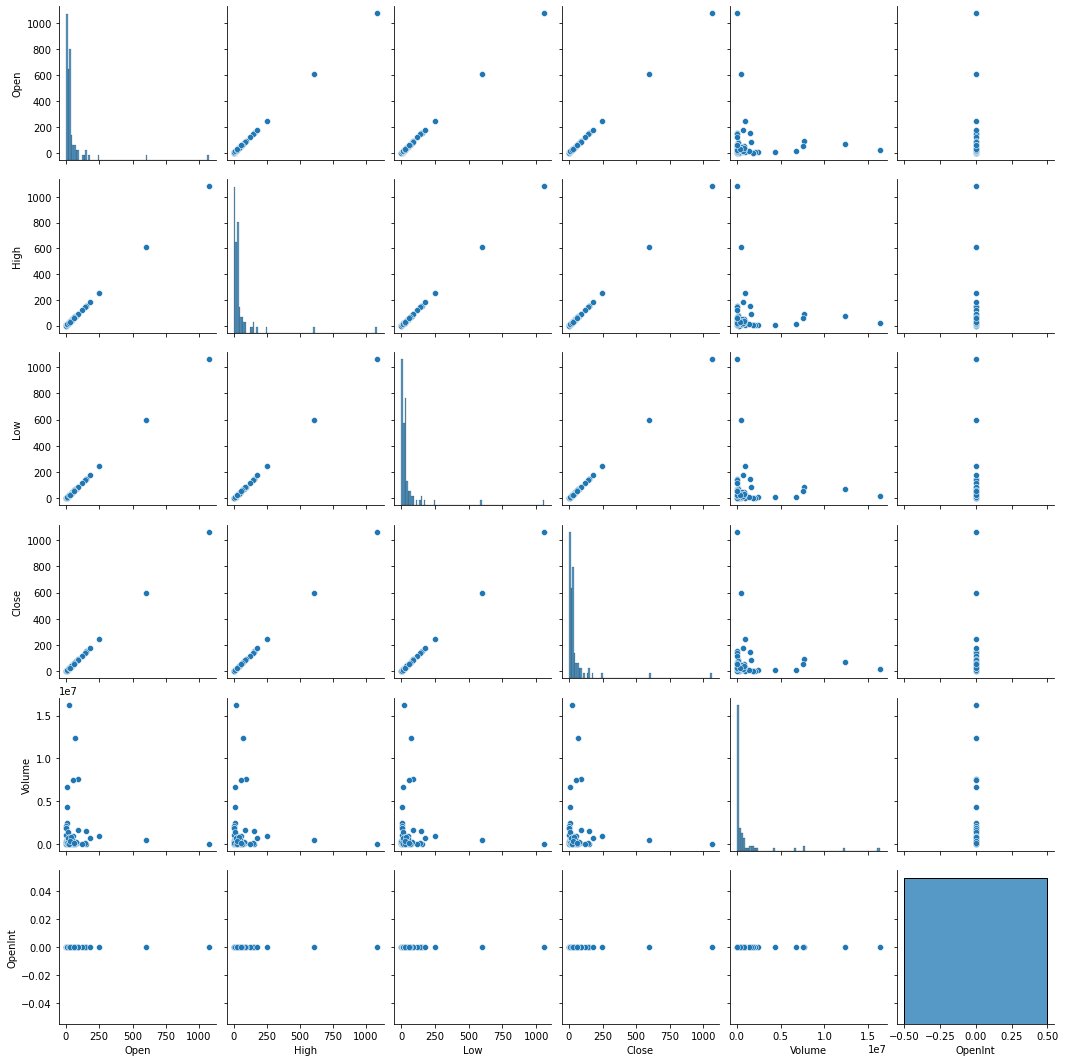

In [14]:
plt.figure(figsize=(5,5))
plt.title('Correlation between each variable on Nov 10, 2017')
sns.pairplot(gd_latest)
plt.show()

<AxesSubplot:>

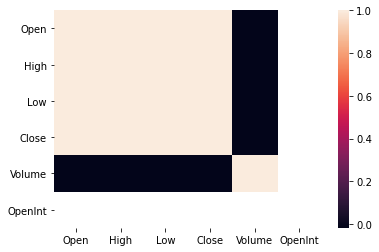

In [12]:
sns.heatmap(gd_latest.corr())

In [15]:
gd_latest['price_change'] = gd_latest.Close - gd_latest.Open

<ipython-input-15-7bef97e12518>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gd_latest['price_change'] = gd_latest.Close - gd_latest.Open


Text(0.5, 0, 'Price Change (Close minus Open)')

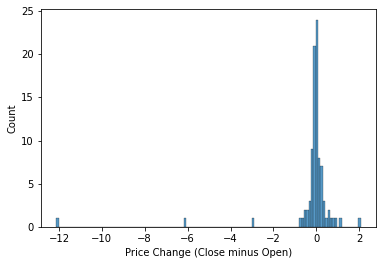

In [16]:
sns.histplot(gd_latest.price_change)
plt.xlabel('Price Change (Close minus Open)')

In [ ]:
gd_latest.sort_values(by='price_change',ascending=False)

In [17]:
grand_df.Dat

,Date,Open,High,Low,Close,Volume,OpenInt,company
0,2005-02-25,16.388,16.406,15.862,16.179,18546,0,qumu
1,2005-02-28,16.016,16.306,15.744,15.898,13478,0,qumu
2,2005-03-01,15.880,15.898,15.581,15.853,30420,0,qumu
3,2005-03-02,15.853,15.853,15.491,15.708,174465,0,qumu
4,2005-03-03,15.771,15.989,15.690,15.935,54368,0,qumu
...,...,...,...,...,...,...,...,...
3195,2017-11-06,58.220,58.390,56.500,56.700,67244,0,jbss
3196,2017-11-07,56.750,57.000,55.100,55.580,86463,0,jbss
3197,2017-11-08,55.380,57.090,55.380,57.030,95411,0,jbss
3198,2017-11-09,56.840,58.100,55.950,57.740,72971,0,jbss


In [ ]:
grand_df[grand_df.Date == '2012-11-10']

In [19]:
import datetime as dt

In [22]:
grand_df.Date = pd.to_datetime(grand_df.Date)

In [28]:
# take mean from each day across all the stocks
grand_df.Date.apply(lambda x: x.month)

0        2
1        2
2        3
3        3
4        3
        ..
3195    11
3196    11
3197    11
3198    11
3199    11
Name: Date, Length: 220636, dtype: int64

In [33]:
grand_df[(grand_df.Date.dt.year == 2012) & (grand_df.Date.dt.month == 11)].Date.unique()

array(['2012-11-01T00:00:00.000000000', '2012-11-02T00:00:00.000000000',
       '2012-11-05T00:00:00.000000000', '2012-11-06T00:00:00.000000000',
       '2012-11-07T00:00:00.000000000', '2012-11-08T00:00:00.000000000',
       '2012-11-09T00:00:00.000000000', '2012-11-12T00:00:00.000000000',
       '2012-11-13T00:00:00.000000000', '2012-11-14T00:00:00.000000000',
       '2012-11-15T00:00:00.000000000', '2012-11-16T00:00:00.000000000',
       '2012-11-19T00:00:00.000000000', '2012-11-20T00:00:00.000000000',
       '2012-11-21T00:00:00.000000000', '2012-11-23T00:00:00.000000000',
       '2012-11-26T00:00:00.000000000', '2012-11-27T00:00:00.000000000',
       '2012-11-28T00:00:00.000000000', '2012-11-29T00:00:00.000000000',
       '2012-11-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [38]:
grand_df[grand_df.Date == '2017-11-10'].High - grand_df[grand_df.Date == '2012-11-09'].High

14      NaN
16      NaN
17      NaN
20      NaN
25      NaN
         ..
6896    NaN
7619    NaN
8156    NaN
10182   NaN
11442   NaN
Name: High, Length: 152, dtype: float64

In [67]:
change = (grand_df[grand_df.Date == '2017-11-10'].set_index('company').High - \
 grand_df[grand_df.Date == '2012-11-09'].set_index('company').High)

In [68]:
change_percent = (change / grand_df[grand_df.Date == '2012-11-09'].set_index('company').High) * 100

In [69]:
gdl = gd_latest.set_index('company')
gdl['5_year_change_perc'] = change_percent

In [70]:
gdl.reset_index(inplace=True)

In [71]:
gdl['appreciated'] = gdl['5_year_change_perc'].apply(lambda x: x > 0)

<AxesSubplot:title={'center':'Distribution of 5 year change (11/9/2012 - 11/10/2017)'}, xlabel='5_year_change_perc', ylabel='Count'>

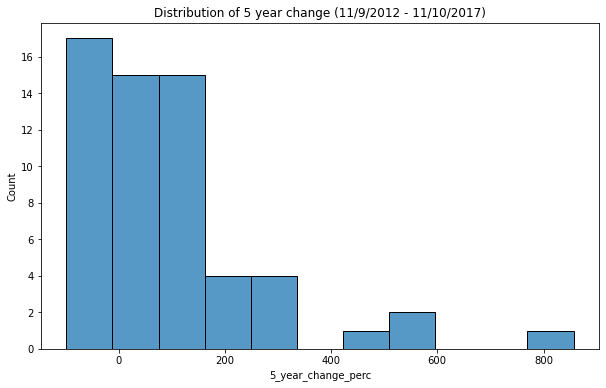

In [72]:
plt.figure(figsize=(10,6))
plt.title('Distribution of 5 year change percentage (11/9/2012 - 11/10/2017)')
sns.histplot(gdl['5_year_change_perc'])

In [75]:
gdl.sort_values(by = '5_year_change_perc', ascending=False)

,company,Date,Open,High,Low,Close,Volume,OpenInt,price_change,5_year_change_perc,appreciated
54,algn,2017-11-10,249.38,251.0150,246.26,249.46,927592,0,0.08,856.612043,True
87,himx,2017-11-10,10.51,10.5932,9.76,9.93,6717299,0,-0.58,527.261961,True
75,atsg,2017-11-10,23.30,23.7700,22.78,23.65,800844,0,0.35,525.526316,True
33,shen,2017-11-10,35.10,35.2500,34.55,34.65,84067,0,-0.45,458.823063,True
91,jbss,2017-11-10,57.73,58.7600,57.05,57.20,74507,0,-0.53,332.376748,True
...,...,...,...,...,...,...,...,...,...,...,...
80,cen,2017-11-10,9.80,9.8800,9.60,9.66,254393,0,-0.14,NaN,False
82,abeo,2017-11-10,14.85,15.4000,14.70,15.25,631745,0,0.40,NaN,False
84,aimt,2017-11-10,32.96,34.0300,32.79,33.77,577732,0,0.81,NaN,False
88,ssw_e,2017-11-10,24.48,24.4800,24.34,24.34,11508,0,-0.14,NaN,False


In [58]:
change / grand_df[grand_df.Date == '2012-11-09'].set_index('company').High

company
abeo          NaN
acst          NaN
aimt          NaN
algn     8.566120
amt      1.197929
           ...   
wba      1.384298
wbia          NaN
wfc_r         NaN
wire     0.457478
wmt      0.439516
Name: High, Length: 94, dtype: float64

In [76]:
grand_df.describe()

,Open,High,Low,Close,Volume,OpenInt
count,220636.000000,220636.000000,220636.000000,220636.000000,2.206360e+05,220636.0
mean,41.575116,42.236680,40.905257,41.564768,1.767376e+06,0.0
std,106.563764,108.736449,104.430126,106.408877,4.715660e+06,0.0
min,0.008210,0.008210,0.000000,0.008210,0.000000e+00,0.0
25%,6.930000,7.042475,6.811000,6.932400,3.860000e+04,0.0
50%,14.972000,15.190500,14.739500,14.978000,1.760765e+05,0.0
75%,32.786500,33.280000,32.280000,32.806000,1.202125e+06,0.0
max,2370.600000,2478.600000,2088.000000,2106.000000,1.919749e+08,0.0


In [7]:
# https://towardsdatascience.com/complete-introduction-to-pyspark-part-4-62a99ce3552a
import findspark
findspark.init()

In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

import seaborn as sns
import matplotlib.pyplot

from pyspark.sql.functions import col, asc
import pyspark.sql.functions as F

spark = SparkSession.builder.master("local[*]").appName('data_analysis').getOrCreate()
sc = spark.sparkContext

In [2]:
stocks = spark.read.csv('/project/ds5559/group4folder/Data/Stocks/', header = True, inferSchema=True).withColumn("stock", F.input_file_name())
stocks = stocks.withColumn("stock", F.split("stock","/"))
stocks = stocks.withColumn("stock", stocks.stock.getItem(F.size("stock")-1))
stocks = stocks.withColumn("stock", F.split("stock",".us.")[0])
stocks.show(5)

/home/txx3ej/.local/lib/python3.8/site-packages/pyspark/sql/column.py:322: FutureWarning: A column as 'key' in getItem is deprecated as of Spark 3.0, and will not be supported in the future release. Use `column[key]` or `column.key` syntax instead.
  warnings.warn(


+----------+------+------+------+------+-------+-------+-----+
|      Date|  Open|  High|   Low| Close| Volume|OpenInt|stock|
+----------+------+------+------+------+-------+-------+-----+
|1962-01-02|0.6277|0.6362|0.6201|0.6201|2575579|      0|   ge|
|1962-01-03|0.6201|0.6201|0.6122|0.6201|1764749|      0|   ge|
|1962-01-04|0.6201|0.6201|0.6037|0.6122|2194010|      0|   ge|
|1962-01-05|0.6122|0.6122|0.5798|0.5957|3255244|      0|   ge|
|1962-01-08|0.5957|0.5957|0.5716|0.5957|3696430|      0|   ge|
+----------+------+------+------+------+-------+-------+-----+
only showing top 5 rows



In [3]:
stocks = stocks.withColumn("PriceChange", stocks.Close - stocks.Open)
stocks.show(10)

+----------+------+------+------+------+-------+-------+-----+--------------------+
|      Date|  Open|  High|   Low| Close| Volume|OpenInt|stock|         PriceChange|
+----------+------+------+------+------+-------+-------+-----+--------------------+
|1962-01-02|0.6277|0.6362|0.6201|0.6201|2575579|      0|   ge|-0.00760000000000...|
|1962-01-03|0.6201|0.6201|0.6122|0.6201|1764749|      0|   ge|                 0.0|
|1962-01-04|0.6201|0.6201|0.6037|0.6122|2194010|      0|   ge|-0.00790000000000...|
|1962-01-05|0.6122|0.6122|0.5798|0.5957|3255244|      0|   ge|-0.01649999999999996|
|1962-01-08|0.5957|0.5957|0.5716|0.5957|3696430|      0|   ge|                 0.0|
|1962-01-09|0.5957|0.6037|0.5878|0.5957|2778285|      0|   ge|                 0.0|
|1962-01-10|0.5957|0.6037|0.5957|0.5957|2337096|      0|   ge|                 0.0|
|1962-01-11|0.5957|0.5957|0.5878|0.5957|1943605|      0|   ge|                 0.0|
|1962-01-12|0.5957|0.6037|0.5878|0.5878|2015151|      0|   ge|-0.00790000000

In [3]:
max_stocks = stocks.filter(stocks.Date=='2017-11-10').select('stock')
min_stocks = stocks.filter(stocks.Date=='1990-12-10').select('stock')

min_stocks = [i.__getitem__('stock') for i in min_stocks.collect()]
max_stocks = [i.__getitem__('stock') for i in max_stocks.collect()]

In [4]:
stocks_to_use = stocks.filter(stocks.stock.isin(max_stocks) & stocks.stock.isin(min_stocks))
stocks_to_use = stocks_to_use.filter(stocks.Date>='1990-12-10')

In [6]:
stocks_to_use.show(5)

+----------+------+------+------+------+--------+-------+-----+--------------------+
|      Date|  Open|  High|   Low| Close|  Volume|OpenInt|stock|         PriceChange|
+----------+------+------+------+------+--------+-------+-----+--------------------+
|1990-12-10|3.8082|3.8324|3.7998|3.7998|17166043|      0|   ge|-0.00839999999999...|
|1990-12-11|3.8082|3.8082| 3.752|3.7841|16028794|      0|   ge|-0.02409999999999...|
|1990-12-12|3.7678|3.8162|3.7355|3.7998|26143300|      0|   ge| 0.03200000000000003|
|1990-12-13|3.7759| 3.792|3.7436|3.7599|15338695|      0|   ge|-0.01600000000000...|
|1990-12-14|3.7355|3.7355|3.6552|3.7115|19412221|      0|   ge|-0.02400000000000002|
+----------+------+------+------+------+--------+-------+-----+--------------------+
only showing top 5 rows



Data Viz mplfinance

In [5]:
# https://medium.com/mlearning-ai/stock-market-data-visualization-using-mplfinance-1d35a8d48e4

import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
stocks_to_use.show(5)

+----------+------+------+------+------+--------+-------+-----+--------------------+
|      Date|  Open|  High|   Low| Close|  Volume|OpenInt|stock|         PriceChange|
+----------+------+------+------+------+--------+-------+-----+--------------------+
|1990-12-10|3.8082|3.8324|3.7998|3.7998|17166043|      0|   ge|-0.00839999999999...|
|1990-12-11|3.8082|3.8082| 3.752|3.7841|16028794|      0|   ge|-0.02409999999999...|
|1990-12-12|3.7678|3.8162|3.7355|3.7998|26143300|      0|   ge| 0.03200000000000003|
|1990-12-13|3.7759| 3.792|3.7436|3.7599|15338695|      0|   ge|-0.01600000000000...|
|1990-12-14|3.7355|3.7355|3.6552|3.7115|19412221|      0|   ge|-0.02400000000000002|
+----------+------+------+------+------+--------+-------+-----+--------------------+
only showing top 5 rows



In [5]:
# https://stackoverflow.com/questions/38080748/convert-pyspark-string-to-date-format

from pyspark.sql.functions import to_timestamp
stocks_to_use.select(to_timestamp(stocks_to_use.Date, 'yyyy-MM-dd').alias('dt')).show(10)




+-------------------+
|                 dt|
+-------------------+
|1990-12-10 00:00:00|
|1990-12-11 00:00:00|
|1990-12-12 00:00:00|
|1990-12-13 00:00:00|
|1990-12-14 00:00:00|
|1990-12-17 00:00:00|
|1990-12-18 00:00:00|
|1990-12-19 00:00:00|
|1990-12-20 00:00:00|
|1990-12-21 00:00:00|
+-------------------+
only showing top 10 rows



In [6]:
# convert Date to timestamp
from pyspark.sql.functions import to_timestamp
stocks_to_use = stocks_to_use.withColumn('Date', to_timestamp(stocks_to_use.Date, 'yyyy-MM-dd'))

In [7]:
stocks_to_use.filter(stocks_to_use.stock == "aapl").show(3)

+-------------------+------+------+------+------+--------+-------+-----+
|               Date|  Open|  High|   Low| Close|  Volume|OpenInt|stock|
+-------------------+------+------+------+------+--------+-------+-----+
|1990-12-10 00:00:00|1.3524|1.3599|1.3294|1.3366|69884968|      0| aapl|
|1990-12-11 00:00:00|1.3202|1.3294|1.2808|1.2808|97018727|      0| aapl|
|1990-12-12 00:00:00| 1.273|1.2808|1.2485|1.2677|67589209|      0| aapl|
+-------------------+------+------+------+------+--------+-------+-----+
only showing top 3 rows



In [8]:
stocks_to_use.filter(stocks_to_use.stock == "jpm").show(3)

+-------------------+------+------+------+------+-------+-------+-----+
|               Date|  Open|  High|   Low| Close| Volume|OpenInt|stock|
+-------------------+------+------+------+------+-------+-------+-----+
|1990-12-10 00:00:00|2.6337|2.6587|2.5336|2.6088|1511441|      0|  jpm|
|1990-12-11 00:00:00|2.6088|2.6088|2.5336|2.5586|1306985|      0|  jpm|
|1990-12-12 00:00:00|2.5838|2.6088|2.5336|2.5838|1658298|      0|  jpm|
+-------------------+------+------+------+------+-------+-------+-----+
only showing top 3 rows



In [9]:
stocks_to_use.filter(stocks_to_use.stock == "wfc").show(3)

+-------------------+------+------+------+------+-------+-------+-----+
|               Date|  Open|  High|   Low| Close| Volume|OpenInt|stock|
+-------------------+------+------+------+------+-------+-------+-----+
|1990-12-10 00:00:00|1.9788|1.9957|1.9455|1.9539| 859252|      0|  wfc|
|1990-12-11 00:00:00|1.9539|1.9539|1.8871|1.8957|1544342|      0|  wfc|
|1990-12-12 00:00:00|1.8957| 1.904|1.8622|1.8957|1502006|      0|  wfc|
+-------------------+------+------+------+------+-------+-------+-----+
only showing top 3 rows



In [7]:
# Wells Fargo, San Francisco, Ca
wfc = stocks_to_use.filter(stocks_to_use.stock == "wfc").toPandas()

In [11]:
wfc

,Date,Open,High,Low,Close,Volume,OpenInt,stock
0,1990-12-10,1.9788,1.9957,1.9455,1.9539,859252,0,wfc
1,1990-12-11,1.9539,1.9539,1.8871,1.8957,1544342,0,wfc
2,1990-12-12,1.8957,1.9040,1.8622,1.8957,1502006,0,wfc
3,1990-12-13,1.8957,1.9373,1.8622,1.8871,757256,0,wfc
4,1990-12-14,1.8871,1.8871,1.7543,1.8043,2057198,0,wfc
...,...,...,...,...,...,...,...,...
6776,2017-11-06,56.1000,56.4300,56.0000,56.1800,10381488,0,wfc
6777,2017-11-07,55.0500,56.2900,55.0500,55.0500,18182265,0,wfc
6778,2017-11-08,54.8000,54.9900,54.0500,54.2600,23864699,0,wfc
6779,2017-11-09,53.9000,54.1900,53.2100,54.0000,24431796,0,wfc


In [18]:
wfc

,Date,Open,High,Low,Close,Volume,OpenInt,stock
0,1990-12-10,1.9788,1.9957,1.9455,1.9539,859252,0,wfc
1,1990-12-11,1.9539,1.9539,1.8871,1.8957,1544342,0,wfc
2,1990-12-12,1.8957,1.9040,1.8622,1.8957,1502006,0,wfc
3,1990-12-13,1.8957,1.9373,1.8622,1.8871,757256,0,wfc
4,1990-12-14,1.8871,1.8871,1.7543,1.8043,2057198,0,wfc
...,...,...,...,...,...,...,...,...
6776,2017-11-06,56.1000,56.4300,56.0000,56.1800,10381488,0,wfc
6777,2017-11-07,55.0500,56.2900,55.0500,55.0500,18182265,0,wfc
6778,2017-11-08,54.8000,54.9900,54.0500,54.2600,23864699,0,wfc
6779,2017-11-09,53.9000,54.1900,53.2100,54.0000,24431796,0,wfc


In [17]:
drys

,Date,Open,High,Low,Close,Volume,OpenInt,stock
0,2005-02-25,2.514307e+08,2.607633e+08,2.469291e+08,2.542854e+08,0,0,drys
1,2005-02-28,2.602143e+08,2.624103e+08,2.410002e+08,2.435255e+08,0,0,drys
2,2005-03-01,2.492349e+08,2.536267e+08,2.431961e+08,2.514307e+08,0,0,drys
3,2005-03-02,2.547246e+08,2.547246e+08,2.463802e+08,2.468193e+08,0,0,drys
4,2005-03-03,2.568107e+08,2.569205e+08,2.433059e+08,2.439647e+08,0,0,drys
...,...,...,...,...,...,...,...,...
3195,2017-11-06,4.700000e+00,5.010000e+00,4.220000e+00,4.490000e+00,13630926,0,drys
3196,2017-11-07,4.840000e+00,4.850000e+00,4.300000e+00,4.370000e+00,6547542,0,drys
3197,2017-11-08,4.300000e+00,4.350000e+00,3.930000e+00,4.115000e+00,4798623,0,drys
3198,2017-11-09,4.000000e+00,4.380000e+00,3.930000e+00,4.190000e+00,2502825,0,drys


/home/txx3ej/.local/lib/python3.8/site-packages/mplfinance/_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


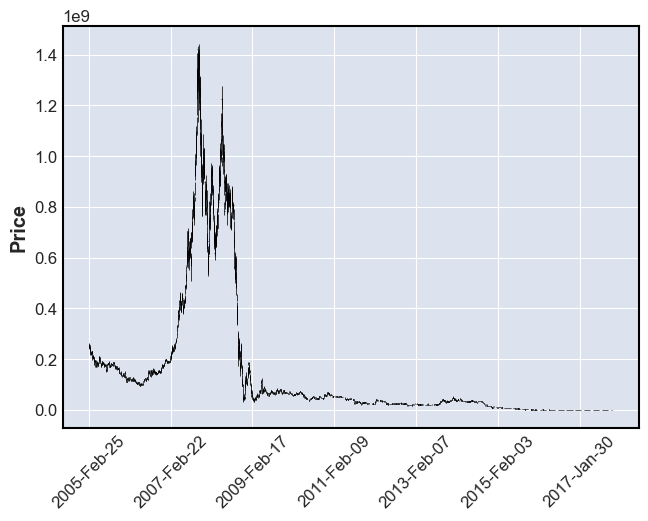

In [19]:
drys = stocks.filter(stocks.stock == "drys").withColumn('Date', to_timestamp(stocks.Date, 'yyyy-MM-dd')).toPandas()
mpf.plot(drys.set_index("Date"))

/home/txx3ej/.local/lib/python3.8/site-packages/mplfinance/_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


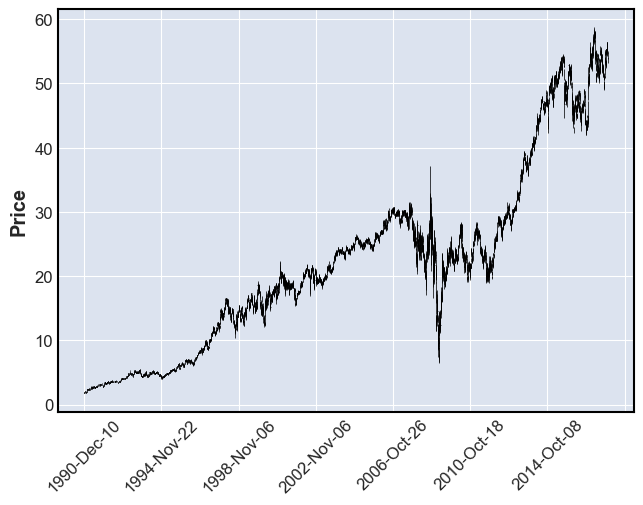

In [13]:
# wfc.set_index("Date",inplace=True)

mpf.plot(wfc.set_index("Date"))

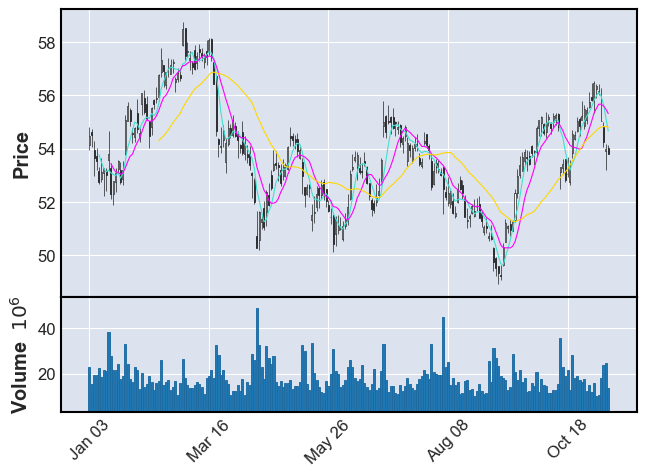

In [20]:
mpf.plot(wfc.set_index('Date')['2017'], type='candle', mav=(5,10,30), volume=True)

In [21]:
# https://medium.com/towards-data-science/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [22]:
wfc.reset_index(inplace=True)
wfc['Date'] = wfc.Date.apply(lambda x: x.toordinal())

In [25]:
df = wfc.drop(['index','stock','OpenInt'],axis=1)
rolling_mean = df.rolling(window = 365).mean()
rolling_std = df.rolling(window = 365).std()

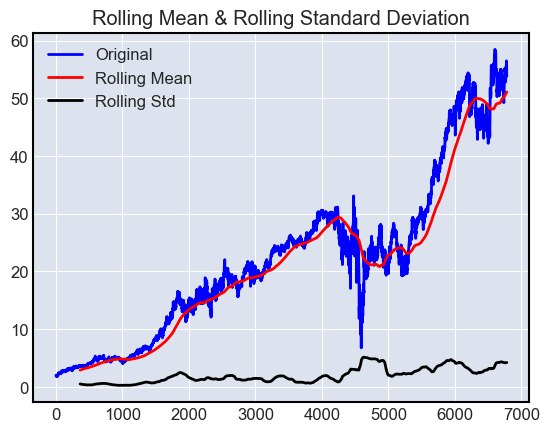

In [26]:
# can't plot because dates must be ordinal days (1,2,3,...)
plt.plot(df.Close, color = 'blue', label = 'Original')
plt.plot(rolling_mean.Close, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std.Close, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [27]:
result = adfuller(df['Close'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -0.19539404773499136
p-value: 0.9390684123419276
Critical Values:
	1%: -3.4313197287332953
	5%: -2.8619685396547623
	10%: -2.5669981079743405


<ipython-input-28-af8ae5ec67d6>:1: RuntimeWarning: divide by zero encountered in log
  df_log = np.log(df)
<ipython-input-28-af8ae5ec67d6>:1: RuntimeWarning: invalid value encountered in log
  df_log = np.log(df)


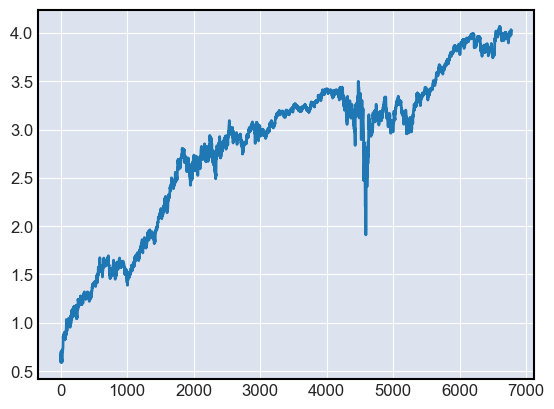

In [28]:
df_log = np.log(df)
# df_log.drop('OpenInt',axis=1,inplace=True)
plt.plot(df_log.Close)

In [36]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=365).mean()
    rolling_std = timeseries.rolling(window=365).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries.Close, color='blue', label='Original')
    mean = plt.plot(rolling_mean.Close, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std.Close, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Close'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

In [38]:
# df_log.drop('PriceChange',axis=1,inplace=True)

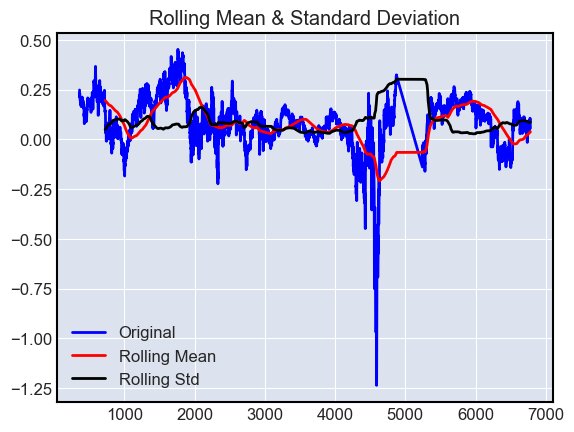

ADF Statistic: -5.3030898430765205
p-value: 5.395531104748029e-06
Critical Values:
	1%: -3.431437268066538
	5%: -2.86202047279024
	10%: -2.5670257531733327


In [39]:
rolling_mean = df_log.rolling(window=365).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)

get_stationarity(df_log_minus_mean)

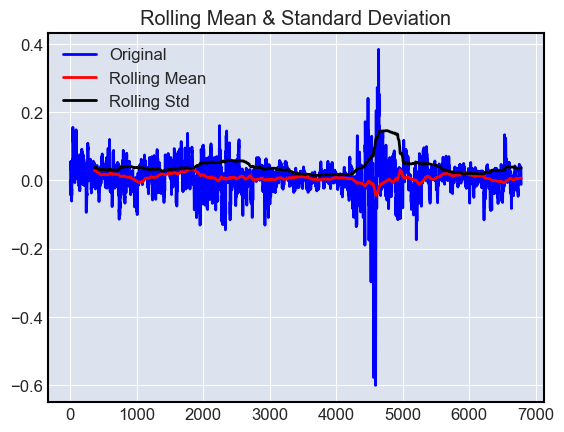

ADF Statistic: -11.255790317182637
p-value: 1.6684580455519885e-20
Critical Values:
	1%: -3.4313197287332953
	5%: -2.8619685396547623
	10%: -2.5669981079743405


In [40]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

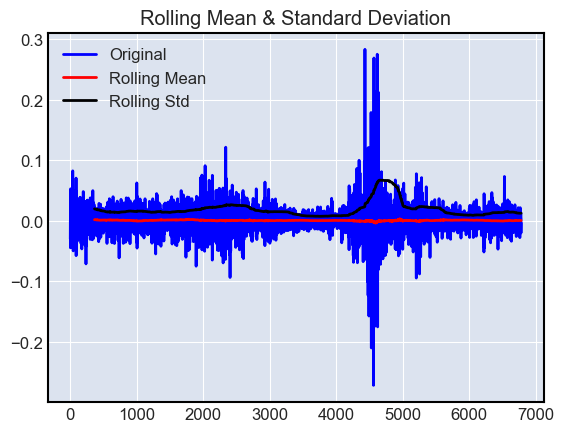

ADF Statistic: -14.231519634315845
p-value: 1.5935209894312954e-26
Critical Values:
	1%: -3.4313197287332953
	5%: -2.8619685396547623
	10%: -2.5669981079743405


In [41]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

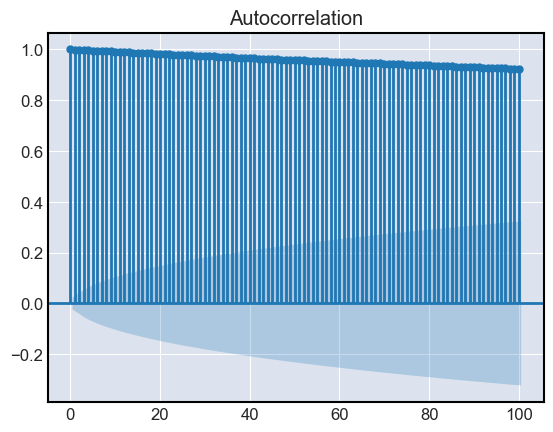

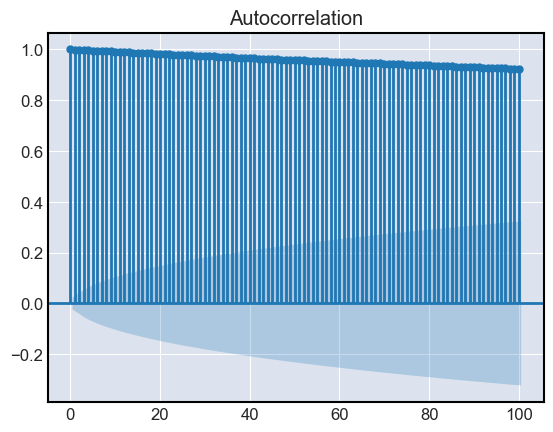

In [69]:
# https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(df_log.Close.squeeze(),lags=100)

/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/statsmo

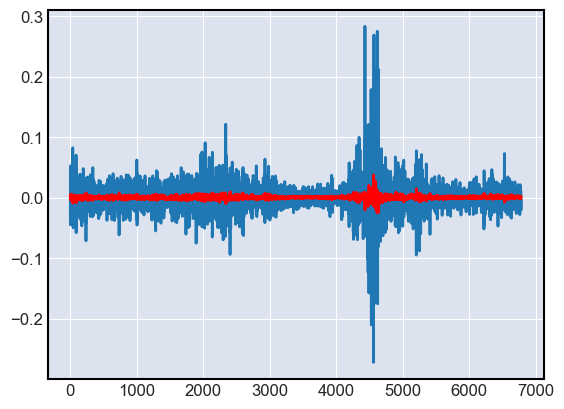

In [57]:
decomposition = seasonal_decompose(df_log.Close,period=1) 
model = ARIMA(df_log.Close, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift.Close)
plt.plot(results.fittedvalues, color='red')

In [93]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['Close'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
predictions_ARIMA

0        1.953900
1        1.954860
2        1.961118
3        1.962734
4        1.967334
          ...    
6776    54.023518
6777    54.013194
6778    54.118010
6779    54.212923
6780    54.316108
Length: 6781, dtype: float64

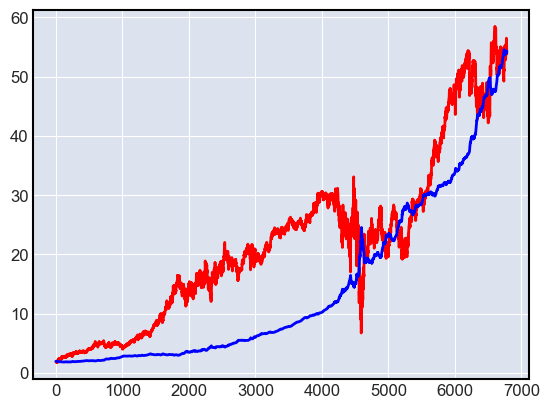

In [75]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['Close'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df.Close,color='red')
plt.plot(predictions_ARIMA,color='blue')

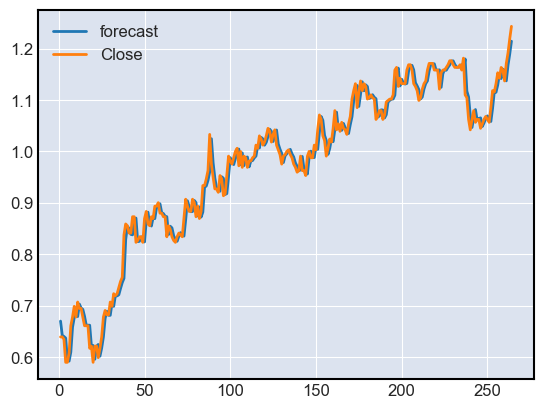

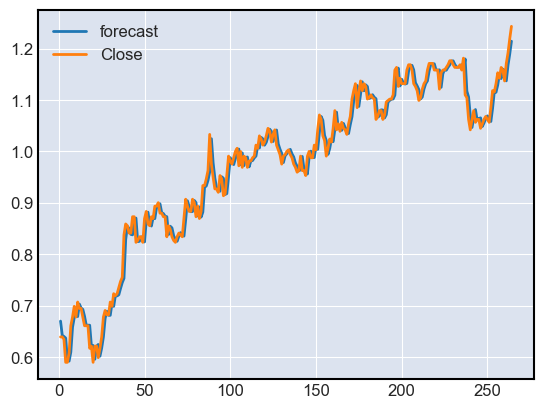

In [61]:
results.plot_predict(1,264)

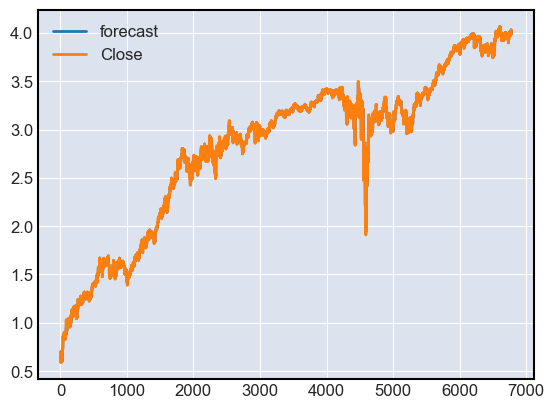

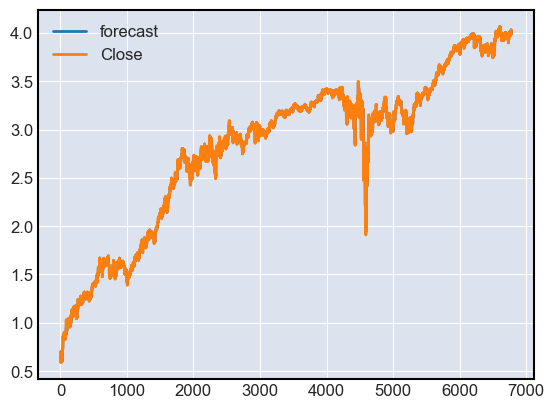

In [74]:
results.plot_predict()

In [84]:
from datetime import datetime
start_index = datetime(2017, 11, 11)
end_index = datetime(2017, 11, 21)
forecast = results.predict(start=6781, end=6791)

In [95]:
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [96]:
forecast

6781    0.001850
6782    0.001424
6783    0.001368
6784    0.001144
6785    0.001068
6786    0.000940
6787    0.000875
6788    0.000797
6789    0.000748
6790    0.000699
6791    0.000664
dtype: float64

In [98]:
inverse_difference(df.Close,forecast)

KeyError: -1

In [88]:
results.fittedvalues

1       0.000491
2       0.003196
3       0.000824
4       0.002341
5       0.005238
          ...   
6776    0.000026
6777   -0.000191
6778    0.001939
6779    0.001752
6780    0.001902
Length: 6780, dtype: float64

In [24]:
# https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd
from pmdarima.arima import auto_arima

In [28]:
data = wfc.set_index("Date").Close.dropna()

In [29]:
data

Date
1990-12-10     1.9539
1990-12-11     1.8957
1990-12-12     1.8957
1990-12-13     1.8871
1990-12-14     1.8043
               ...   
2017-11-06    56.1800
2017-11-07    55.0500
2017-11-08    54.2600
2017-11-09    54.0000
2017-11-10    53.8100
Name: Close, Length: 6781, dtype: float64

<AxesSubplot:xlabel='Date'>

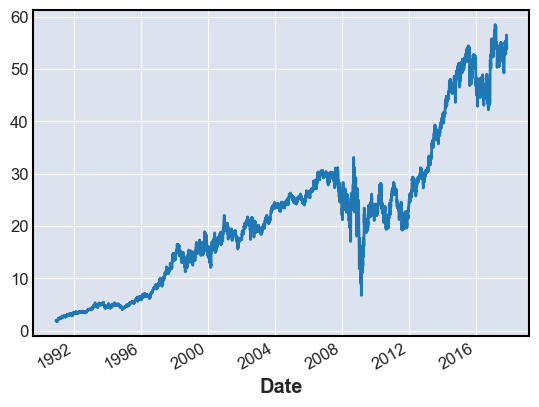

In [30]:
data.plot()

In [31]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data)

(0.4362663717263515, True)

In [36]:
arima_model = auto_arima(data, start_p=0, d=1, start_q=0,
            max_p=5, max_d=5, max_q=5, start_P=0,
            D=1, start_Q=0, max_P=5, max_D=5,
            max_Q=5, m=12, seasonal=True,
            error_action='warn',trace = True,
            supress_warnings=True, stepwise = True,
            random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=13635.125, Time=0.29 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=11510.111, Time=1.81 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=7.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=13591.905, Time=0.39 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=10649.805, Time=3.07 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=10255.146, Time=8.49 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=10003.134, Time=13.01 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=9821.459, Time=31.64 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=240.74 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=309.20 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=9887.752, Time=38.91 sec
 ARIMA(2,1,0)(5,1,0)[12]             : AIC=9823.107, Time=73.97 sec
 ARIMA(1,1,1)(5,1,0)[12]             : AIC=9822.465, Time=157.35 sec
 ARIMA(0,1,1)(5,1,0)[12]             : AIC=9822.461, Time=88.65 sec
 ARIMA(2,1,1)(5,1

In [37]:
arima_model = auto_arima(data, start_p=0, d=1, start_q=0,
            max_p=3, max_d=1, max_q=3, start_P=0,
            D=1, start_Q=0, max_P=3, max_D=3,
            max_Q=5, m=12, seasonal=True,
            error_action='warn',trace = True,
            supress_warnings=True, stepwise = True,
            random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=13635.125, Time=0.42 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=11510.111, Time=2.50 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=16.17 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=13591.905, Time=0.69 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=10649.805, Time=4.20 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=10255.146, Time=22.81 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=10003.134, Time=50.07 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=9821.459, Time=165.75 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=1413.94 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=357.43 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=9887.752, Time=134.53 sec
 ARIMA(2,1,0)(5,1,0)[12]             : AIC=9823.107, Time=224.82 sec
 ARIMA(1,1,1)(5,1,0)[12]             : AIC=9822.465, Time=456.11 sec
 ARIMA(0,1,1)(5,1,0)[12]             : AIC=9822.461, Time=164.94 sec
 ARIMA(2,1

In [39]:
train = data[:-10]
test = data[-10:]

In [40]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 10), index=test.index)

In [52]:
((prediction[0] - test)**2).mean()

3.1411337939796793

In [44]:
forecast_pd = model.predict(future_pd)

f_pd = forecast_pd[['ds', 'yhat', 'yhat_upper', 'yhat_lower']].set_index('ds')
st_pd = stock_pd[['ds', 'stock', 'y']].set_index('ds')

result_pd = f_pd.join(st_pd, how='left')
result_pd.reset_index(level=0, inplace=True)
result_pd['stock'] = stock_pd['stock'].iloc[0]

return result_pd[['ds', 'stock', 'y', 'yhat', 'yhat_upper', 'yhat_lower']]

Date
2017-10-30    55.462
2017-10-31    55.750
2017-11-01    55.820
2017-11-02    56.480
2017-11-03    56.350
2017-11-06    56.180
2017-11-07    55.050
2017-11-08    54.260
2017-11-09    54.000
2017-11-10    53.810
Name: Close, dtype: float64

In [56]:
data['stock'] = 'wfc'

In [63]:
wfc['stock'].iloc[0]

'wfc'

In [8]:
wfc

,Date,Open,High,Low,Close,Volume,OpenInt,stock
0,1990-12-10,1.9788,1.9957,1.9455,1.9539,859252,0,wfc
1,1990-12-11,1.9539,1.9539,1.8871,1.8957,1544342,0,wfc
2,1990-12-12,1.8957,1.9040,1.8622,1.8957,1502006,0,wfc
3,1990-12-13,1.8957,1.9373,1.8622,1.8871,757256,0,wfc
4,1990-12-14,1.8871,1.8871,1.7543,1.8043,2057198,0,wfc
...,...,...,...,...,...,...,...,...
6776,2017-11-06,56.1000,56.4300,56.0000,56.1800,10381488,0,wfc
6777,2017-11-07,55.0500,56.2900,55.0500,55.0500,18182265,0,wfc
6778,2017-11-08,54.8000,54.9900,54.0500,54.2600,23864699,0,wfc
6779,2017-11-09,53.9000,54.1900,53.2100,54.0000,24431796,0,wfc


In [13]:
from pmdarima.arima import auto_arima
# wfc.set_index('Date',inplace=True)

train = wfc.Close[:-10]
test = wfc.Close[-10:]

arima_model = auto_arima(train, start_p=0, d=1, start_q=0,
        max_p=1, max_d=1, max_q=1, start_P=0,
        D=1, start_Q=0, max_P=1, max_D=1,
        max_Q=5, m=12, seasonal=True,
        error_action='warn',trace = True,
        supress_warnings=True, stepwise = True,
        random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=13597.965, Time=0.93 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=11486.985, Time=1.50 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=4.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=13552.915, Time=0.33 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.97 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=4.26 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=11547.262, Time=0.76 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=inf, Time=8.20 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=11486.975, Time=1.34 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=13551.426, Time=0.72 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=6.23 sec
 ARIMA(0,1,1)(1,1,0)[12] intercept   : AIC=11488.974, Time=3.12 sec

Best model:  ARIMA(0,1,1)(1,1,0)[12]          
Total fit time: 36.582 seconds


In [14]:
import pandas as pd
prediction = pd.DataFrame(arima_model.predict(n_periods = 10), index=test.index)
# MSE = ((prediction[0] - test)**2).mean()

result_pd = prediction.rename({0:'y_hat'},axis=1)
result_pd['y'] = test
result_pd['stock'] = wfc['stock'].iloc[0]

In [15]:
result_pd.reset_index().dtypes

Date     datetime64[ns]
y_hat           float64
y               float64
stock            object
dtype: object